/home/pirl/anaconda3/envs/py35/lib/python3.5/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log2
  
/home/pirl/anaconda3/envs/py35/lib/python3.5/site-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in multiply
  


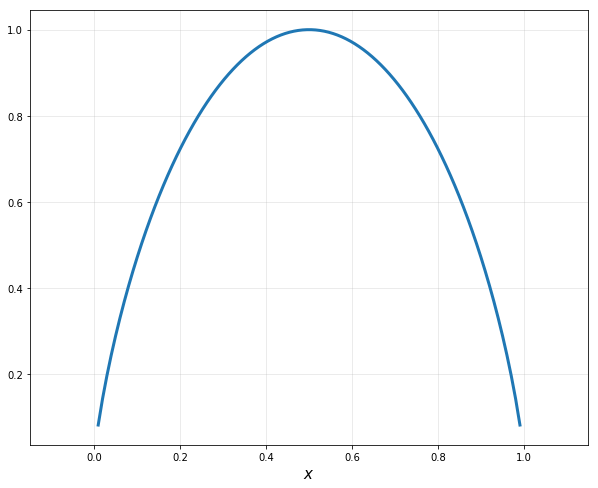

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

x = np.linspace(0, 1, 100)
y = -x*np.log2(x) - (1-x)*np.log2(1-x)

plt.figure(figsize = (10, 8))
plt.plot(x, y, linewidth = 3)
plt.xlabel(r'$x$', fontsize = 15)
plt.axis('equal')
plt.grid(alpha = 0.3)
plt.show()

In [3]:
def D(x):
    y = -x*np.log2(x) - (1-x)*np.log2(1-x)
    return y

In [5]:
from sklearn import tree
from sklearn.tree import export_graphviz
import pydotplus
from IPython.display import Image

In [6]:
data = np.array([[0, 0, 1, 0, 0],
                [1, 0, 2, 0, 0],
                [0, 1, 2, 0, 1],
                [2, 1, 0, 2, 1],
                [0, 1, 0, 1, 1],
                [1, 1, 1, 2, 0],
                [1, 1, 0, 2, 0],
                [0, 0, 2, 1, 0]])      

x = data[:,0:4]
y = data[:,4]
print(x, '\n')
print(y)

[[0 0 1 0]
 [1 0 2 0]
 [0 1 2 0]
 [2 1 0 2]
 [0 1 0 1]
 [1 1 1 2]
 [1 1 0 2]
 [0 0 2 1]] 

[0 0 1 1 1 0 0 0]


In [7]:
clf = tree.DecisionTreeClassifier(criterion = 'entropy', max_depth = 3, random_state=0)
clf.fit(x,y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [8]:
clf.predict([[0, 0, 1, 0]])

array([0])

In [9]:
# just run this cell to set the PATH variable.

import os, sys
PATH = 'graphviz-2.38\\release\\bin'
os.environ["PATH"] += os.pathsep + PATH

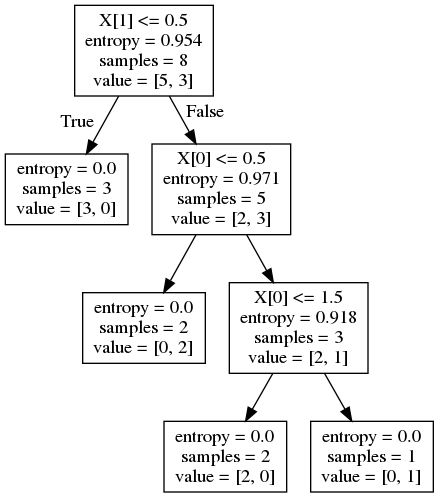

In [10]:
dot_data = export_graphviz(clf)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

# look different from what we compute by hands because "tree.DecisionTreeClassifier" uses a binary classifier

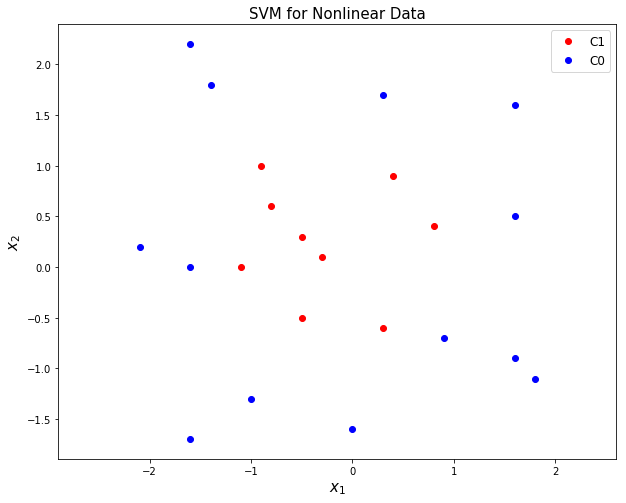

In [11]:
# Nonlinear Classification
X1 = np.array([[-1.1,0],[-0.3,0.1],[-0.9,1],[0.8,0.4],[0.4,0.9],[0.3,-0.6],
               [-0.5,0.3],[-0.8,0.6],[-0.5,-0.5]])
     
X0 = np.array([[-1,-1.3], [-1.6,2.2],[0.9,-0.7],[1.6,0.5],[1.8,-1.1],[1.6,1.6],
               [-1.6,-1.7],[-1.4,1.8],[1.6,-0.9],[0,-1.6],[0.3,1.7],[-1.6,0],[-2.1,0.2]])

X1 = np.asmatrix(X1)
X0 = np.asmatrix(X0)

plt.figure(figsize=(10, 8))
plt.plot(X1[:,0], X1[:,1], 'ro', label = 'C1')
plt.plot(X0[:,0], X0[:,1], 'bo', label = 'C0')
plt.title('SVM for Nonlinear Data', fontsize = 15)
plt.xlabel(r'$x_1$', fontsize = 15)
plt.ylabel(r'$x_2$', fontsize = 15)
plt.legend(loc = 1, fontsize = 12)
plt.axis('equal')
plt.show()

In [12]:
N = X1.shape[0]
M = X0.shape[0]

X = np.vstack([X1, X0])
y = np.vstack([np.ones([N,1]), np.zeros([M,1])])

In [14]:
clf = tree.DecisionTreeClassifier(criterion = 'entropy', max_depth = 4, random_state=0)
clf.fit(X,y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [15]:
clf.predict([[0, 1]])

array([1.])

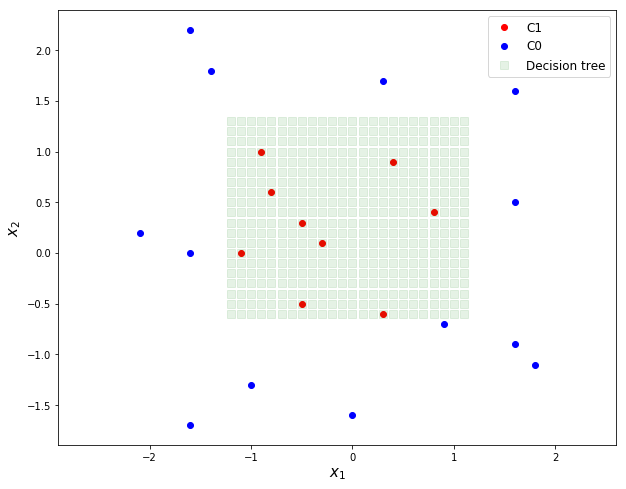

In [16]:
# to plot
[X1gr, X2gr] = np.meshgrid(np.arange(-3,3,0.1), np.arange(-3,3,0.1))

Xp = np.hstack([X1gr.reshape(-1,1), X2gr.reshape(-1,1)])
Xp = np.asmatrix(Xp)

q = clf.predict(Xp)
q = np.asmatrix(q).reshape(-1,1)

C1 = np.where(q == 1)[0]

plt.figure(figsize = (10, 8))
plt.plot(X1[:,0],X1[:,1], 'ro', label = 'C1')
plt.plot(X0[:,0],X0[:,1], 'bo', label = 'C0')
plt.plot(Xp[C1,0], Xp[C1, 1], 'gs', markersize = 8, alpha =0.1, label = 'Decision tree')
plt.xlabel(r'$x_1$', fontsize = 15)
plt.ylabel(r'$x_2$', fontsize = 15)
plt.legend(loc = 1, fontsize = 12)
plt.axis('equal')
plt.show()

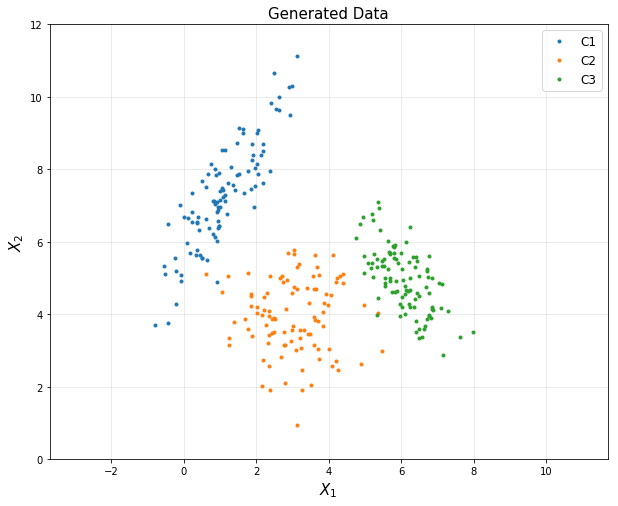

In [17]:
# Multiclass Classification
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## generate three simulated clusters
mu1 = np.array([1, 7])
mu2 = np.array([3, 4])
mu3 = np.array([6, 5])

SIGMA1 = 0.8*np.array([[1, 1.5],
                       [1.5, 3]])
SIGMA2 = 0.5*np.array([[2, 0],
                       [0, 2]])
SIGMA3 = 0.5*np.array([[1, -1],
                       [-1, 2]])

X1 = np.random.multivariate_normal(mu1, SIGMA1, 100)
X2 = np.random.multivariate_normal(mu2, SIGMA2, 100)
X3 = np.random.multivariate_normal(mu3, SIGMA3, 100)

y1 = 1*np.ones([100,1])
y2 = 2*np.ones([100,1])
y3 = 3*np.ones([100,1])

plt.figure(figsize = (10, 8))
plt.title('Generated Data', fontsize = 15)
plt.plot(X1[:,0], X1[:,1], '.', label = 'C1')
plt.plot(X2[:,0], X2[:,1], '.', label = 'C2')
plt.plot(X3[:,0], X3[:,1], '.', label = 'C3')
plt.xlabel('$X_1$', fontsize = 15)
plt.ylabel('$X_2$', fontsize = 15)
plt.legend(fontsize = 12)
plt.axis('equal')
plt.grid(alpha = 0.3)
plt.axis([-2, 10, 0, 12])
plt.show()

In [20]:
X = np.vstack([X1, X2, X3])
y = np.vstack([y1, y2, y3])

clf = tree.DecisionTreeClassifier(criterion = 'entropy', max_depth = 3, random_state=0)
clf.fit(X,y)
X

array([[ 1.14081908e+00,  7.28898578e+00],
       [ 8.50244189e-01,  6.12950063e+00],
       [ 1.51448465e+00,  7.86567926e+00],
       [ 1.92663862e+00,  6.96591123e+00],
       [ 5.03227406e-01,  7.66206933e+00],
       [ 9.61781965e-02,  5.95968437e+00],
       [ 8.65239861e-01,  8.01318161e+00],
       [ 2.62958960e+00,  9.64542067e+00],
       [ 1.72952959e-01,  5.67367165e+00],
       [ 2.37938254e-01,  6.80688546e+00],
       [ 3.72176331e-01,  5.77553565e+00],
       [ 2.18223318e+00,  8.69364919e+00],
       [ 8.18371765e-01,  6.19892219e+00],
       [ 1.01168260e+00,  6.96508861e+00],
       [ 1.05848107e+00,  8.53993707e+00],
       [ 2.37629495e-01,  7.35088591e+00],
       [ 9.11786634e-01,  6.02451091e+00],
       [ 2.18205209e+00,  7.61296353e+00],
       [ 1.00908898e+00,  7.14705431e+00],
       [ 1.90335285e+00,  8.40057563e+00],
       [ 1.88922106e+00,  8.26222346e+00],
       [ 2.01817509e+00,  8.14370595e+00],
       [ 2.40622796e+00,  9.82780979e+00],
       [-6.

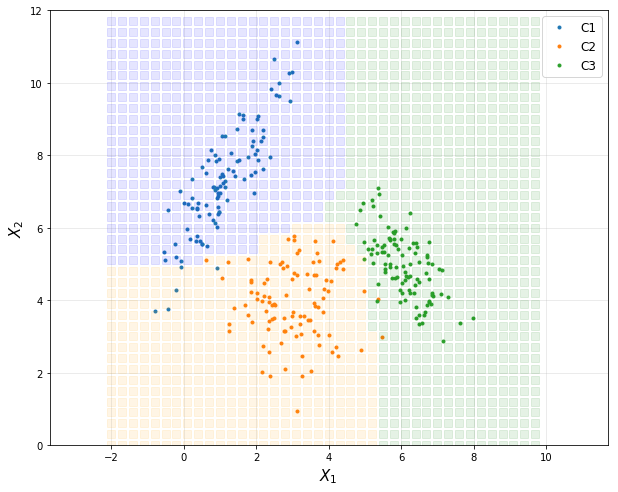

In [24]:
res = 0.3
[X1gr, X2gr] = np.meshgrid(np.arange(-2,10,res), np.arange(0,12,res))

Xp = np.hstack([X1gr.reshape(-1,1), X2gr.reshape(-1,1)])
Xp = np.asmatrix(Xp)

q = clf.predict(Xp)
q = np.asmatrix(q).reshape(-1,1)

C1 = np.where(q == 1)[0]
C2 = np.where(q == 2)[0]
C3 = np.where(q == 3)[0]

plt.figure(figsize = (10, 8))
plt.plot(X1[:,0], X1[:,1], '.', label = 'C1')
plt.plot(X2[:,0], X2[:,1], '.', label = 'C2')
plt.plot(X3[:,0], X3[:,1], '.', label = 'C3')
plt.plot(Xp[C1,0], Xp[C1,1], 's', color = 'blue', markersize = 8, alpha = 0.1)
plt.plot(Xp[C2,0], Xp[C2,1], 's', color = 'orange', markersize = 8, alpha = 0.1)
plt.plot(Xp[C3,0], Xp[C3,1], 's', color = 'green', markersize = 8, alpha = 0.1)
plt.xlabel('$X_1$', fontsize = 15)
plt.ylabel('$X_2$', fontsize = 15)
plt.legend(fontsize = 12)
plt.axis('equal')
plt.grid(alpha = 0.3)
plt.axis([-2, 10, 0, 12])
plt.show()

In [23]:
# Random Forest
from sklearn import ensemble

clf = ensemble.RandomForestClassifier(n_estimators = 100, max_depth = 3, random_state= 0)
clf.fit(X,np.ravel(y))

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=3, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

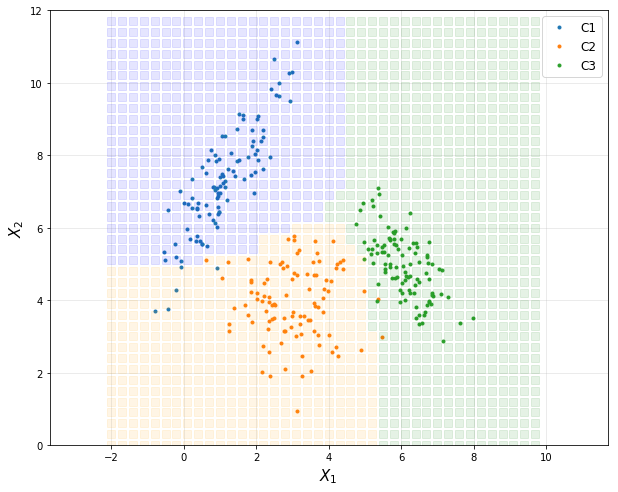

In [25]:
res = 0.3
[X1gr, X2gr] = np.meshgrid(np.arange(-2,10,res), np.arange(0,12,res))

Xp = np.hstack([X1gr.reshape(-1,1), X2gr.reshape(-1,1)])
Xp = np.asmatrix(Xp)

q = clf.predict(Xp)
q = np.asmatrix(q).reshape(-1,1)

C1 = np.where(q == 1)[0]
C2 = np.where(q == 2)[0]
C3 = np.where(q == 3)[0]

plt.figure(figsize = (10, 8))
plt.plot(X1[:,0], X1[:,1], '.', label = 'C1')
plt.plot(X2[:,0], X2[:,1], '.', label = 'C2')
plt.plot(X3[:,0], X3[:,1], '.', label = 'C3')
plt.plot(Xp[C1,0], Xp[C1,1], 's', color = 'blue', markersize = 8, alpha = 0.1)
plt.plot(Xp[C2,0], Xp[C2,1], 's', color = 'orange', markersize = 8, alpha = 0.1)
plt.plot(Xp[C3,0], Xp[C3,1], 's', color = 'green', markersize = 8, alpha = 0.1)
plt.xlabel('$X_1$', fontsize = 15)
plt.ylabel('$X_2$', fontsize = 15)
plt.legend(fontsize = 12)
plt.axis('equal')
plt.grid(alpha = 0.3)
plt.axis([-2, 10, 0, 12])
plt.show()

array([[ 1.14081908e+00,  7.28898578e+00],
       [ 8.50244189e-01,  6.12950063e+00],
       [ 1.51448465e+00,  7.86567926e+00],
       [ 1.92663862e+00,  6.96591123e+00],
       [ 5.03227406e-01,  7.66206933e+00],
       [ 9.61781965e-02,  5.95968437e+00],
       [ 8.65239861e-01,  8.01318161e+00],
       [ 2.62958960e+00,  9.64542067e+00],
       [ 1.72952959e-01,  5.67367165e+00],
       [ 2.37938254e-01,  6.80688546e+00],
       [ 3.72176331e-01,  5.77553565e+00],
       [ 2.18223318e+00,  8.69364919e+00],
       [ 8.18371765e-01,  6.19892219e+00],
       [ 1.01168260e+00,  6.96508861e+00],
       [ 1.05848107e+00,  8.53993707e+00],
       [ 2.37629495e-01,  7.35088591e+00],
       [ 9.11786634e-01,  6.02451091e+00],
       [ 2.18205209e+00,  7.61296353e+00],
       [ 1.00908898e+00,  7.14705431e+00],
       [ 1.90335285e+00,  8.40057563e+00],
       [ 1.88922106e+00,  8.26222346e+00],
       [ 2.01817509e+00,  8.14370595e+00],
       [ 2.40622796e+00,  9.82780979e+00],
       [-6.